In [1]:
import pandas as pd
import os

In [2]:
import numpy as np

In [3]:
import time
from tqdm import tqdm

In [4]:
import tensorflow as tf
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

Using TensorFlow backend.


In [22]:
movie = pd.read_csv("/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/cleaned_movies.csv", encoding='utf-8')

In [23]:
titles = movie.Title.tolist()

In [24]:
x = []
x_titles = []
for name in tqdm((os.listdir("/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/Images/"))):
    sb = "/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/Images/"+name
    s = name[:-4]
    x_titles.append(s)
    if(s in titles):
        img = cv2.imread(sb)
        x.append(img)

100%|██████████| 37873/37873 [01:56<00:00, 324.72it/s]


In [25]:
len(x)

36117

In [28]:
movie.head(5)

,Unnamed: 0,Title,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,#1 Cheerleader Camp (2010),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,#chicagoGirl: The Social Network Takes on a Di...,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,#Horror (2015),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,#Pellichoopulu (2016),0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4,"$1,000 on the Black (1966)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
df = movie.drop(movie.columns[0:2], axis=1)

In [32]:
df.head(5)

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
y = df.values

In [35]:
x = np.stack(x)

In [36]:
print(x.shape)
print(y.shape)

(36117, 268, 182, 3)
(36117, 28)


In [37]:
from sklearn.cross_validation import train_test_split

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [39]:
input_shape = x_train[0].shape
num_class = y_train.shape[1]
print(input_shape)
print(num_class)

(268, 182, 3)
28


In [40]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 2
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 3
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 4
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 5
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# layer 6
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# layer 7
model.add(Dense(num_class))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [42]:
model.fit(x_train, y_train,
          batch_size=128, epochs=1, verbose=1)

Epoch 1/1
25281/25281 [==============================] - 2797s 111ms/step - loss: 0.2793 - acc: 0.9091


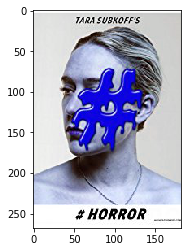

In [44]:
plt.imshow(x[2])

In [45]:
prediction = model.predict(x_test)

In [57]:
print(prediction[789])

[0.1557053  0.00464702 0.1005618  0.04384075 0.0560305  0.33233923
 0.13197292 0.09450976 0.49791127 0.0582358  0.05472148 0.01280107
 0.00435981 0.03209863 0.10204118 0.03490109 0.02235343 0.05884871
 0.00415468 0.00256521 0.17929699 0.04822774 0.02787663 0.01640228
 0.01166807 0.12783161 0.02782671 0.01991237]


In [66]:
np.argmax(prediction[1200])

8

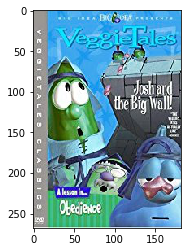

In [67]:
plt.imshow(x_test[789])

In [68]:
evaluate = model.evaluate(x_test,y_test)
print(evaluate)
print(model.metrics_names)

10836/10836 [==============================] - 155s 14ms/step
[0.21706690361751493, 0.9220554400476066]
['loss', 'acc']
